## HW05
___

## A)

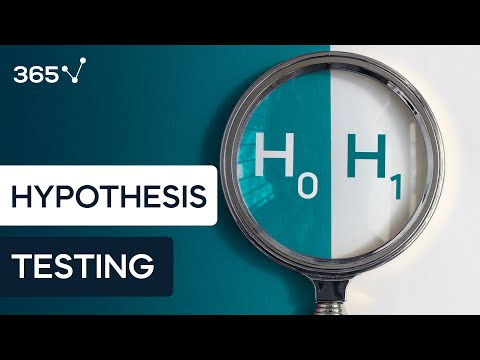

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

## B)


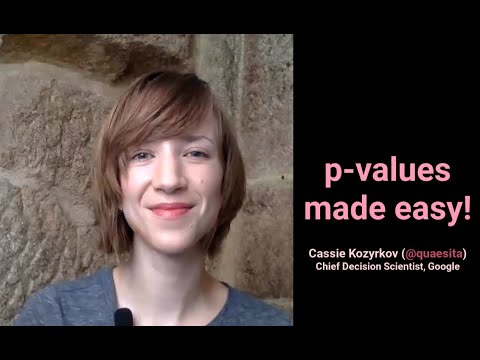

In [3]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

___
## 1)


**What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically?**
- The key factor would be if there is data to examine and test statistically. As long as we have data to compute and measure, we can examine and test statistically.


**What would you describe is the key "criteria" defining what a good null hypothesis is?**
- The key 'criteria' for what a good null hypothesis is would be that it can be rejected provided evidence and represents a 'no change' scenario wherein we can conclude that something else has happened contrary to the initial assumption.

**And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing?**
- The difference between the two would be that the null hypothesis hypothesizes that there is no significant effect which we aim to disprove with evidence while the alternative hypothesis hypothesizes that there is a significant effect which is what we aim to prove.

___
## 2)

- Hypothesis testing is used to derive an assumption on the population as a whole based on the samples gathered. As we gather data from samples (the sample values), we calculate the average of the samples where then we compare it to the the hypothesized value of the population mean under the null hypothesis relative to hypothesis testing to gather an inference on the actual value of μ.

___
## 3)

- When we try to calculate the p-value, we first have to start with the assumption that the null hypothesis is true. From there, we observe if there is something unusual in the sample data that leads us to believe whether or not there is a high likelihood of the null hypothesis is true. This is where we try to calculate the p-value since the p-value indicates how consistent or inconsistent the observed data is under the assumption that the null hypothesis is true.

___
## 4)

- The p-value essentially tells us how consistent the observed data is under the assumption that the null hypothesis is true. When the p-value is small, it means that, under the assumption of the null hypothesis, the data we observed is unusual or inconsistent with what we expected. Because of this inconsistency, we may doubt that the null hypothesis is actually true and be led to reject it in favor of the alternative hypothesis.

___
## 5)


In [1]:
import numpy as np

# Parameters
num_couples = 124         # Total number of couples
observed_right_tilts = 80 # Observed number of right tilts
num_simulations = 10000   # Number of simulations

# Run the simulation
simulated_tilts = np.random.binomial(num_couples, 0.5, num_simulations)

# Calculate the p-value (proportion of simulations with 80 or more right tilts)
p_value = np.mean(simulated_tilts >= observed_right_tilts)

print(p_value)

0.0017


Based from the p-value chart, the level of evidence we have against H<sub>0</sub> is strong.

___
## 6)



- We cannot definitively conclude anything using p-values. The p-values only suggest the likelihood of a hypothesis being true. So, no, we cannot definitively say that Fido is innocent nor guilty using a p-value. Low p-values indicate that the null hypothesis is more likely to be false, while high p-values indicate that the null hypothesis is more likely to be true. Low p-values are less than the significance level (which is usually 0.05) while high p-values are more than the significance level.

## 7)



In [6]:
import pandas as pd
import numpy as np

# Your existing patient data
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate health score change
patient_data['HealthScoreChange'] = patient_data.FinalHealthScore - patient_data.InitialHealthScore

# Set random seed
np.random.seed(1) 
number_of_simulations = 10000  
n_size = len(patient_data)  

# Simulate under H0 (null hypothesis)
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

for i in range(number_of_simulations):
    # Simulate random improvement with equal probability (50% chance)
    random_improvement = np.random.choice([0, 1], size=n_size, replace=True)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Observed statistic: proportion of patients with improvement
observed_statistic = (patient_data.HealthScoreChange > 0).mean()

# One-tailed test: Check if simulated statistics are greater than or equal to the observed statistic
SimStats_as_or_more_extreme_than_ObsStat = simulated_statistics >= observed_statistic

# Calculate the p-value
p_value = np.mean(SimStats_as_or_more_extreme_than_ObsStat)

# Output the results
print("Observed statistic (proportion of improvements):", observed_statistic)
print("One-tailed p-value:", p_value)


Observed statistic (proportion of improvements): 0.8
One-tailed p-value: 0.0565


In the revised code, we simulated a one-tailed test wherein we only check if the statistic is greater than or equal to the expected proportion of improvements. In the context of the vaccine data analysis, we are trying to see if there was an increase in health scores (since we are using a right-tailed test, whereas if it was left-tailed it would be the decrease). Since you only consider deviations in one direction, the p-value should be smaller in a one-tailed test compared to the p-value in a two-tailed test.

___
## 8)

### Problem Introduction

This problem revolves around replicating a famous experiment performed by Ronald Fisher and Dr. Muriel Bristol. The original experiment aimed to test whether Dr. Bristol could correctly distinguish whether milk or tea was poured first. In the current scenario, we are interested in testing whether the 49 students out of 80 in STA130 who correctly identified the order of pouring are doing so by chance or if there is evidence to suggest that they are better than random guessing. 

The population we are trying to infer consists of every individual who can taste and identify the order of milk and tea when poured. The sample we have is the 80 students in STA130 in the current scenario. The parameter of interest is the true proportion of students in the population who can correctly identify the order of pouring. In this scenario, the observed test statistic can be calculated using the proportion of students who answered correctly.

#### Relationship between this experiment and the original with Fisher and Bristol

Both experiments focus on the ability of individuals to distinguish between two conditions (milk or tea being poured first). Fisher’s original experiment was designed to test a claim of sensory discrimination using a small sample (8 cups of tea) and was analyzed using a permutation test (specifically Fisher’s exact test). In this scenario, we are dealing with a larger sample of 80 students, and the analysis can be approached using the binomial distribution since the outcomes (correct/incorrect identification) are binary.

#### Statements of the Null Hypothesis and Alternative hypothesis

Null Hypothesis (H₀): The students are guessing randomly, meaning the probability of correctly identifying the order of pouring is 0.5 (like flipping a fair coin).

H<sub>0</sub> : p = 0.5

Alternative Hypothesis (H₁): The students have an ability better than random guessing to correctly identify the order of pouring.

H₁: p > 0.5

Where p is the proportion of students correctly identifying the order of pouring.

### Quantitative Analysis

To analyze the data, we can model the situation using a binomial distribution. The number of correct identifications follows a binomial distribution:

X∼Binomial(n=80,p=0.5)

The probability of observing 49 or more correct identifications under the null hypothesis can be calculated using a one-tailed test, where we are interested in seeing if the proportion p is greater than 0.5. This can be done through a binomial test.

For a binomial test, we can calculate the exact p-value using:

P(X ≥ 49∣n=80,p=0.5)

#### Methodology Code and Explanations

This code calculates the exact p-value using a binomial test:

In [13]:
import scipy.stats as stats

# Parameters
n = 80  # Total number of students
k = 49  # Number of correct guesses
p_null = 0.5  # Null hypothesis proportion

# Perform the one-tailed binomial test
# For a one-tailed test where we are testing if the proportion is greater than 0.5
p_value_one_tailed = 1 - stats.binom.cdf(k - 1, n, p_null)

# Output the p-value
print("One-tailed p-value:", p_value_one_tailed)

One-tailed p-value: 0.028332213172560516


#### Supporting Visualizations

We can plot the binomial distribution under the null hypothesis p = 0.5 and highlight the area corresponding to 49 or more correct identifications.




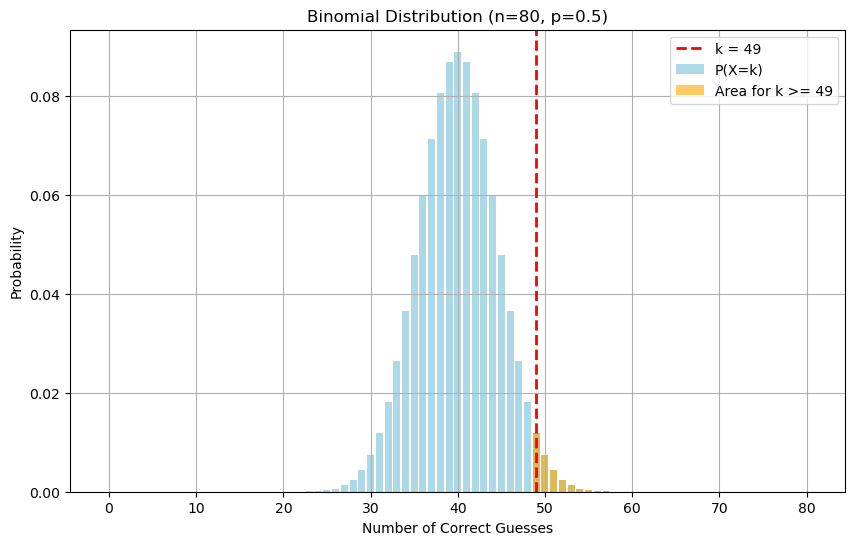

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
n = 80  # Total number of trials (students)
p = 0.5  # Probability of success under the null hypothesis

# Generate possible number of successes (0 to n)
k_values = np.arange(0, n + 1)
# Calculate the binomial probability mass function
binomial_distribution = stats.binom.pmf(k_values, n, p)

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(k_values, binomial_distribution, color='lightblue', label='P(X=k)')
plt.title('Binomial Distribution (n=80, p=0.5)')
plt.xlabel('Number of Correct Guesses')
plt.ylabel('Probability')

# Highlight the area corresponding to 49 or more correct identifications
k_highlight = np.arange(49, n + 1)
highlight_area = stats.binom.pmf(k_highlight, n, p)

# Fill the area above 49
plt.bar(k_highlight, highlight_area, color='orange', label='Area for k >= 49', alpha=0.6)

# Add a vertical line at k = 49
plt.axvline(x=49, color='red', linestyle='dashed', linewidth=2, label='k = 49')

# Add a legend
plt.legend()
plt.grid()
plt.show()


### Findings and Discussion

Binomial Test: The p-value from the binomial test tells us the probability of observing 49 or more correct identifications assuming the null hypothesis (random guessing) is true. If this p-value is sufficiently small (e.g., p < 0.05), we reject the null hypothesis and conclude that the students have some ability to distinguish the order of pouring.

#### Conclusion regarding the Null Hypothesis

Since the p-value is less than the significance level (0.0283 < 0.05), we can reject the null hypothesis. This means there is sufficient evidence to conclude that the students have a better ability than random guessing in identifying whether milk or tea was poured first. Thus, we can accept the alternative hypothesis wherein the proportion of students correctly identifying the order of pouring is greater than 50%. This further suggests that the students are likely able to discern the difference in taste based on the order of pouring, similar to how Dr. Muriel Bristol was able to distinguish between the two in Fisher’s original experiment.



___
## 9)

Somewhat


___

## ChatGPT chat log summaries


### Coin Flipping Simulation P-value
https://chatgpt.com/share/670eae2d-8f70-8011-b522-68eaa409ecca

### Statistical Analysis of Tea
https://chatgpt.com/share/670eae1f-2368-8011-b052-62752b5abc16


